In [79]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

In [80]:
img = cv2.imread('sar_1_gray.jpg')

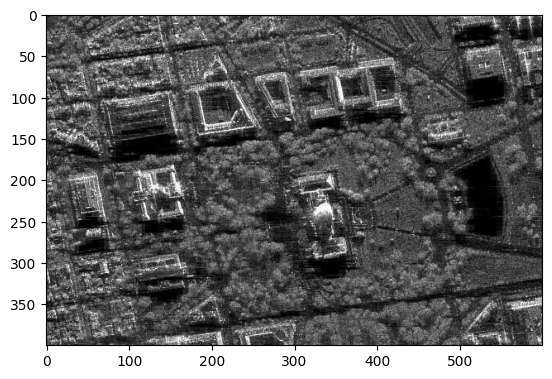

In [81]:
plt.imshow(img)

In [82]:
img[250,250]

array([74, 74, 74], dtype=uint8)

In [83]:
img_roi = img[100:200, 400:600]

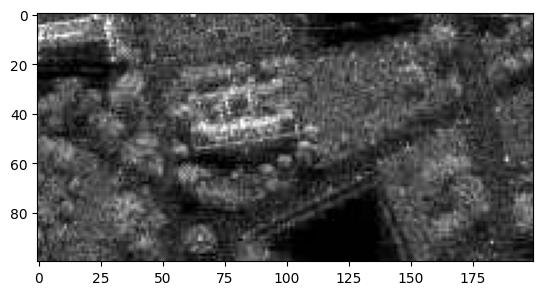

In [84]:
plt.imshow(img_roi)

## Гистограмма

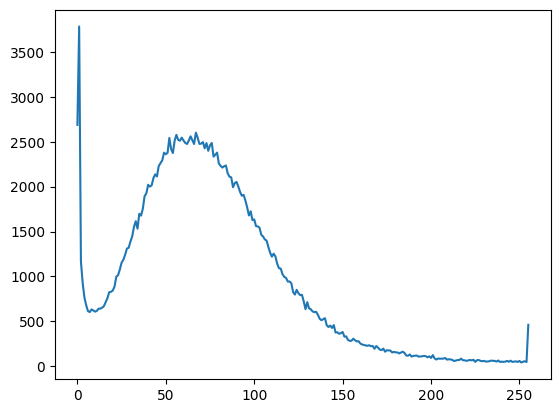

In [85]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([img], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)

In [86]:
b_hist_cum = b_hist.cumsum()

Text(0, 0.5, 'Количество пикселей')

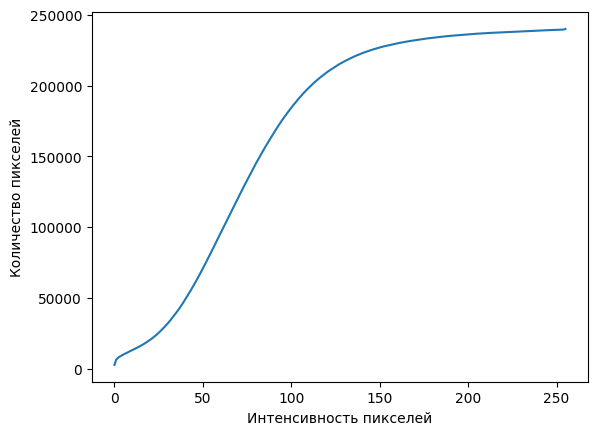

In [87]:
plt.plot(b_hist_cum)
plt.xlabel('Интенсивность пикселей')
plt.ylabel('Количество пикселей')

In [88]:
gamma1 = 0.1

MSE: 21665.0396
SSIM: 0.3395


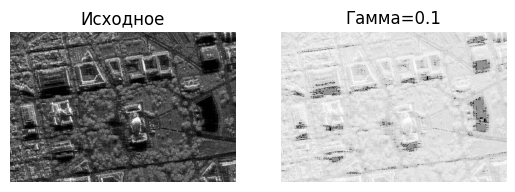

In [89]:
gamma_corrected = np.array(255 * (img / 255.0) ** gamma1, dtype='uint8')

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Исходное")
plt.axis('off')

mse_value = mean_squared_error(img, gamma_corrected)

ssim_value, _ = ssim(img, gamma_corrected, full=True, win_size=3)

print(f"MSE: {mse_value:.4f}")
print(f"SSIM: {ssim_value:.4f}")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Гамма={gamma1}")
plt.axis('off')

plt.show()

In [90]:
gamma1 = 2.5

MSE: 3556.5202
SSIM: 0.3092


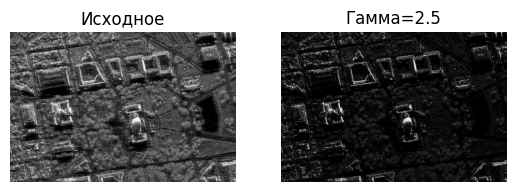

In [91]:
gamma_corrected = np.array(255 * (img / 255.0) ** gamma1, dtype='uint8')

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Исходное")
plt.axis('off')

mse_value1 = mean_squared_error(img, gamma_corrected)

ssim_value1, _ = ssim(img, gamma_corrected, full=True, win_size=3)

print(f"MSE: {mse_value1:.4f}")
print(f"SSIM: {ssim_value1:.4f}")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Гамма={gamma1}")
plt.axis('off')

plt.show()

In [92]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eq_gray = cv2.equalizeHist(img_gray)

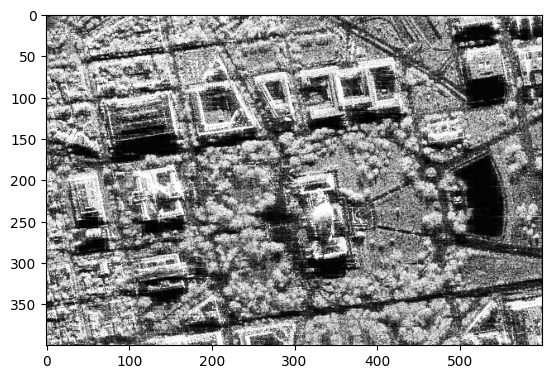

In [93]:
plt.imshow(eq_gray, cmap="gray")

In [94]:
_,thresh1 = cv2.threshold(img_gray,60,255,cv2.THRESH_BINARY)
_,thresh2 = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY)
_,thresh3 = cv2.threshold(img_gray,254,255,cv2.THRESH_BINARY)

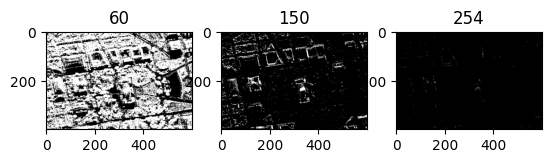

In [95]:
plt.subplot(1,3,1)
plt.title("60")
plt.imshow(thresh1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(thresh1, cmap='gray')
plt.title("150")
plt.imshow(thresh2, cmap='gray')
plt.subplot(1,3,3)
plt.title("254")
plt.imshow(thresh3, cmap='gray')

plt.show()